In [22]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML


In [24]:
import supervised
supervised.__version__

'0.11.5'

In [25]:
data = datasets.load_iris()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"], name="target").map({i:v for i, v in enumerate(data["target_names"])})

In [26]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

In [28]:
# Use 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [29]:
automl = AutoML(total_time_limit=60, explain_level = 1,mode="Perform")
automl.fit(X_train, y_train)

AutoML directory: AutoML_6
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Linear', 'Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
* Step simple_algorithms will try to check up to 1 model
1_Linear logloss 0.163627 trained in 2.88 seconds (1-sample predict time 0.0201 seconds)
* Step default_algorithms will try to check up to 5 models
[1]	train's multi_logloss: 1.01246	validation's multi_logloss: 1.02056
[2]	train's multi_logloss: 0.936033	validation's multi_logloss: 0.950877
[3]	train's multi_logloss: 0.867736	validation's multi_logloss: 0.888234
[4]	train's multi_logloss: 0.806341	validation's multi_logloss: 0.83157
[5]	train's multi_logloss: 0.750882	validation's multi_logloss: 0.780094

AutoML(explain_level=1, mode='Perform', total_time_limit=60)

In [19]:
# Predict
y_predicted = automl.predict(X_test)

result = pd.DataFrame({"Predicted": y_predicted, "Target": np.array(y_test)})
filtro = result.Predicted == result.Target
print(filtro.value_counts(normalize=True))

True     0.888889
False    0.111111
dtype: float64


In [9]:
# confusion matrix
df = pd.DataFrame(result)
confusion_matrix = pd.crosstab(df['Target'], df['Predicted'], rownames=['Target'], colnames=['Predicted'], margins = True)
confusion_matrix

Predicted,setosa,versicolor,virginica,All
Target,,,,
setosa,15,0,0,15
versicolor,0,13,2,15
virginica,0,1,14,15
All,15,14,16,45


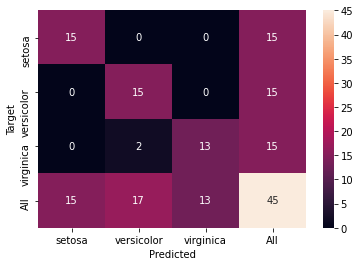

In [10]:
# Plot with seaborn
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [11]:
Automl = AutoML(mode="Explain")